In [1]:
%pip install pandas matplotlib textblob

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\nolaw\anaconda3\lib\site-packages (2.2.2)



In [2]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install "C:\Users\nolaw\Downloads\TA_Lib-0.4.29-cp312-cp312-win_amd64.whl"

Processing c:\users\nolaw\downloads\ta_lib-0.4.29-cp312-cp312-win_amd64.whl
TA-Lib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
from datetime import datetime
from textblob import TextBlob

# silence warnings
import warnings
warnings.filterwarnings('ignore')

# Accessing and understanding the data

In [90]:
data = pd.read_csv("../data/raw_analyst_ratings.csv")

In [5]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [6]:
data.shape

(1407328, 6)

In [7]:
data.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [8]:
data.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [11]:
#clean data by removing duplicates on the data frame

data.drop_duplicates(inplace=True)
data.shape

(1407328, 6)

# Descriptive Statistics

In [12]:
# Get the length of each headline
data['headline_length'] = data['headline'].str.len()

# Descriptive statistics of headline length
data['headline_length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45428 entries, 1980-12-12 to 2024-07-30
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       45428 non-null  int64  
 1   headline         45428 non-null  object 
 2   url              45428 non-null  object 
 3   publisher        45428 non-null  object 
 4   stock            45428 non-null  object 
 5   Sentiment_Score  45428 non-null  float64
 6   polarity         45428 non-null  float64
 7   subjectivity     45428 non-null  float64
 8   sentiment        45428 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.5+ MB


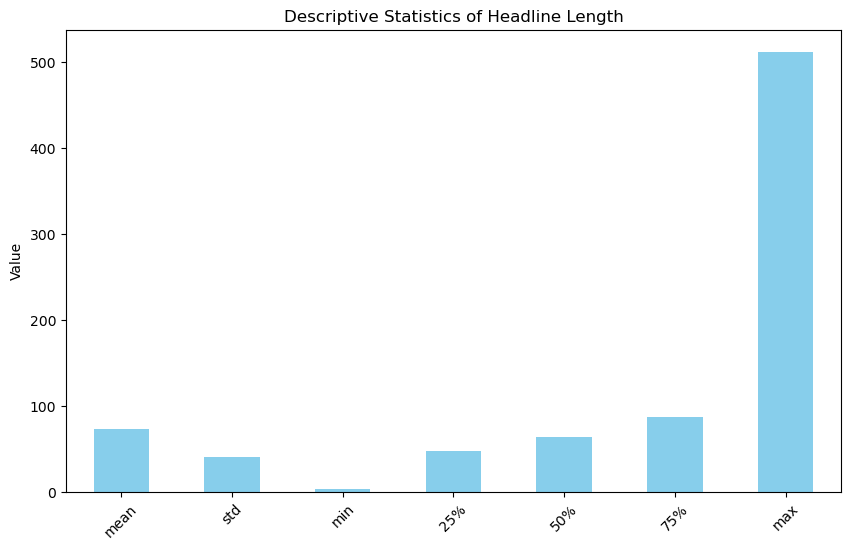

In [14]:
# Plot the descriptive statistics

plt.figure(figsize=(10, 6))
data['headline_length'].describe().drop('count').plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Descriptive Statistics of Headline Length')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Show the plot
plt.show()


# publisher Analysis

 ## 1.count of number of articles per publisher

In [15]:
# Publisher count sorted in descending order
publisher_counts = data['publisher'].value_counts().sort_values(ascending = False)

publisher_counts.head(10)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

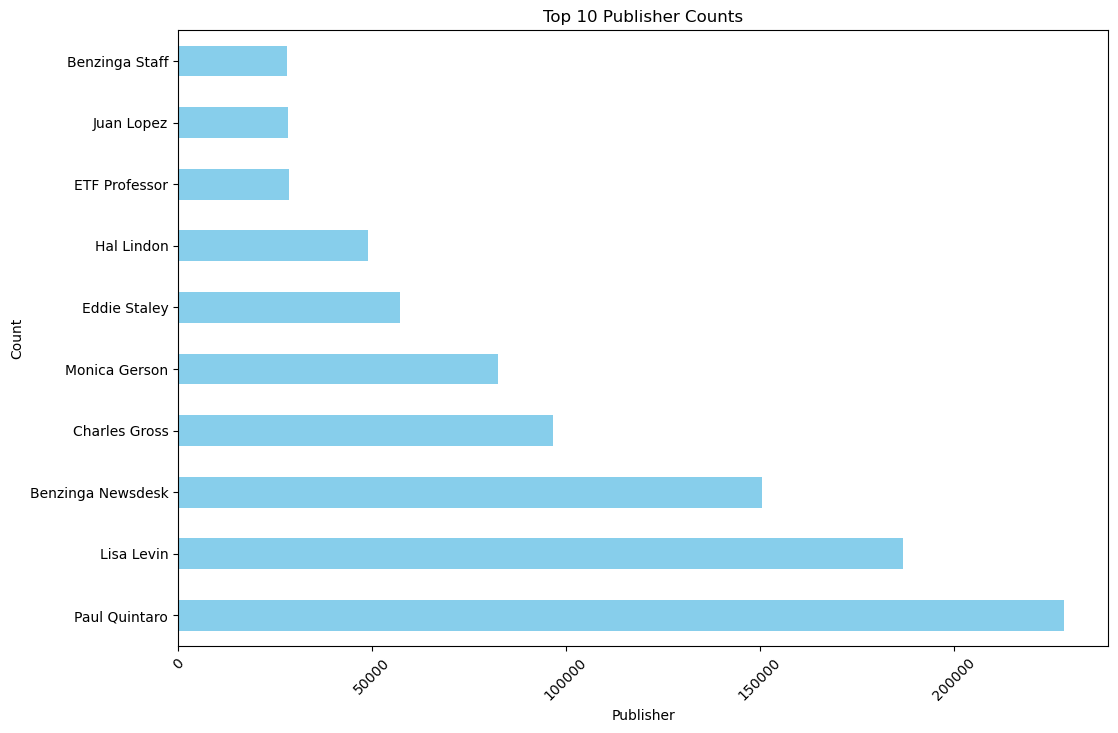

In [18]:

# Get the top 10 publishers
top_10_publishers = publisher_counts.head(10)

# Plotting the top 10 publisher counts as a bar chart
plt.figure(figsize=(12, 8))
top_10_publishers.plot(kind='barh', color='skyblue')

# Add titles and labels
plt.title('Top 10 Publisher Counts')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()



## 2.Analysis on publication dates

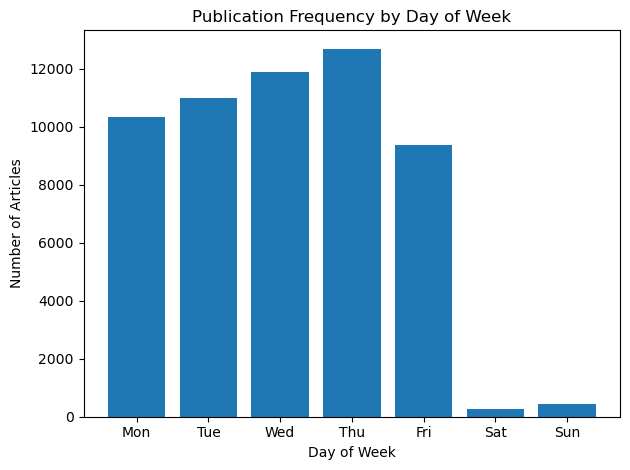

In [19]:
# Convert the data column to datetime format
data['datetime'] = pd.to_datetime(data['date'], errors='coerce')

# Analyze publication frequency by day of week
day_of_week_counts = data['datetime'].dt.dayofweek.value_counts()

# Plot publication frequency by day of week
plt.bar(day_of_week_counts.index, day_of_week_counts.values)
plt.xlabel('Day of Week')
plt.ylabel('Number of Articles')
plt.title('Publication Frequency by Day of Week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Customize x-axis labels
plt.tight_layout()
plt.show()


## 3.identify unique domains

In [24]:
 #Apply the regex pattern to extract the domain from email addresses
import re  # Import the regular expressions module

# Define your regex pattern
pattern = r'@([\w.-]+)'

# Assuming 'data' is your DataFrame
data['domain'] = data['publisher'].apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else '')

# Get the unique domains
unique_domains = data['domain'].unique()

# Print the results
print("Unique Domains:")
print(unique_domains)


Unique Domains:
['' 'benzinga.com' 'gmail.com' 'andyswan.com' 'investdiva.com'
 'eosdetroit.io' 'tothetick.com' 'forextraininggroup.com'
 'stockmetrix.net']


# Text Analysis

In [20]:
# Sentiment Analysis on the first 10 headlines
sentiment_analysis = []
for headline in data['headline'].head(100):  # Use head(10) to get the first 50000
  sentiment = TextBlob(headline).sentiment
  sentiment_analysis.append({
      "original_headline": headline,  # Can be replaced with original headline if needed
      "sentiment": sentiment,
      "sentiment_category": "Positive" if sentiment.polarity > 0.5 else ("Negative" if sentiment.polarity < -0.5 else "Neutral")
  })

# Print results
for analysis in sentiment_analysis:
  print(f"Original Headline: {analysis['original_headline']}")  # Can be replaced with original headline if needed
  print(f"Sentiment: {analysis['sentiment']}")
  print(f"Sentiment Category: {analysis['sentiment_category']}")
  print("------")

Original Headline: Stocks That Hit 52-Week Highs On Friday
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment Category: Neutral
------
Original Headline: Stocks That Hit 52-Week Highs On Wednesday
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment Category: Neutral
------
Original Headline: 71 Biggest Movers From Friday
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment Category: Neutral
------
Original Headline: 46 Stocks Moving In Friday's Mid-Day Session
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment Category: Neutral
------
Original Headline: B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment Category: Neutral
------
Original Headline: CFRA Maintains Hold on Agilent Technologies, Lowers Price Target to $85
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment Category: Neutral
------
Original Headline: UBS Maintains Neutral

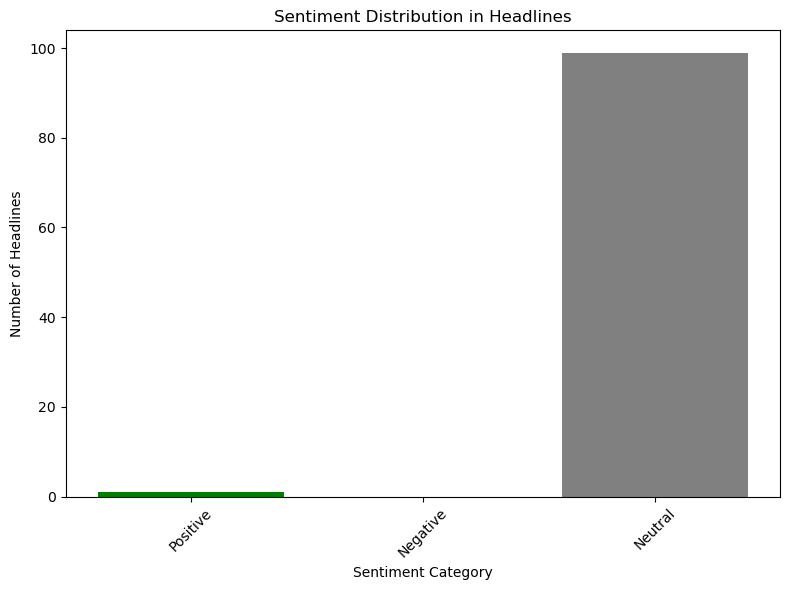

In [21]:
# Count sentiment occurrences
sentiment_counts = {"Positive": 0, "Negative": 0, "Neutral": 0}
for analysis in sentiment_analysis:
  sentiment_counts[analysis["sentiment_category"]] += 1

# Extract sentiment categories and counts
sentiment_categories = list(sentiment_counts.keys())
sentiment_values = list(sentiment_counts.values())

# Create bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(sentiment_categories, sentiment_values, color=['green', 'red', 'gray'])
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Headlines")
plt.title("Sentiment Distribution in Headlines")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Time-series Analysis

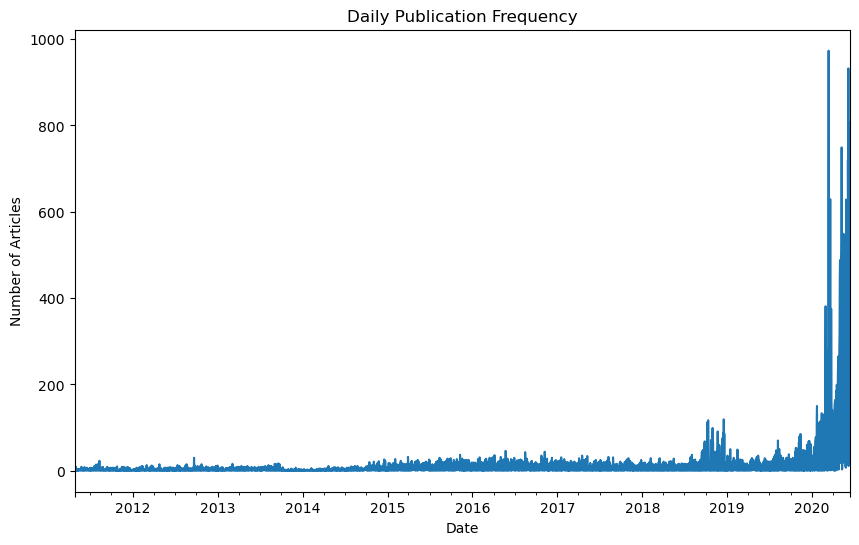

In [25]:
# Assuming 'date' column contains publication dates
data['datetime'] = pd.to_datetime(data['date'], errors='coerce')  # Adjust format if needed

# Set 'datetime' as the index
data.set_index('datetime', inplace=True)

# Now you can use resample
daily_counts = data.resample('D')['headline'].count()

# Plot daily publication frequency
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Daily Publication Frequency')
plt.show()

# Date Alignment

In [91]:
# Convert 'date' column to datetime format in the news data
data['date'] = pd.to_datetime(data['date'])

# Set 'date' as the index for the news DataFrame
data.set_index('date', inplace=True)

# Display the first few rows to verify
print(data.head())


            Unnamed: 0                                           headline  \
date                                                                        
2020-06-05           0            Stocks That Hit 52-Week Highs On Friday   
2020-06-03           1         Stocks That Hit 52-Week Highs On Wednesday   
2020-05-26           2                      71 Biggest Movers From Friday   
2020-05-22           3       46 Stocks Moving In Friday's Mid-Day Session   
2020-05-22           4  B of A Securities Maintains Neutral on Agilent...   

                                                          url  \
date                                                            
2020-06-05  https://www.benzinga.com/news/20/06/16190091/s...   
2020-06-03  https://www.benzinga.com/news/20/06/16170189/s...   
2020-05-26  https://www.benzinga.com/news/20/05/16103463/7...   
2020-05-22  https://www.benzinga.com/news/20/05/16095921/4...   
2020-05-22  https://www.benzinga.com/news/20/05/16095304/b...   

    

In [92]:
# Check for duplicate dates in the news DataFrame
duplicates = data.index.duplicated()
if duplicates.any():
    print("Duplicate dates found:")
    print(data.index[duplicates])


Duplicate dates found:
DatetimeIndex(['2020-05-22', '2020-05-22', '2020-05-22', '2020-05-22',
               '2020-05-22', '2020-05-22', '2020-05-22', '2020-05-22',
               '2020-05-21', '2020-05-21',
               ...
               '2013-07-29', '2013-07-26', '2013-07-25', '2013-07-15',
               '2013-06-18', '2013-06-14', '2013-06-04', '2013-06-04',
               '2013-05-02', '2013-03-22'],
              dtype='datetime64[ns]', name='date', length=1044634, freq=None)


In [93]:
# Drop duplicate dates, keeping the first occurrence
data = data[~data.index.duplicated(keep='first')]


In [95]:
# Check if the index is monotonic increasing
is_monotonic = data.index.is_monotonic_increasing
print(f"Index is monotonic increasing: {is_monotonic}")

# Check if the index is monotonic decreasing
is_monotonic = data.index.is_monotonic_decreasing
print(f"Index is monotonic decreasing: {is_monotonic}")


Index is monotonic increasing: False
Index is monotonic decreasing: False


In [96]:
# Sort the index of the news DataFrame
data = data.sort_index()

# Verify the index is now sorted
print(data.index.is_monotonic_increasing)


True


In [98]:
# Reindex news data to match the dates in the stock data (combined_df)
data = data.reindex(combined_df.index, method='nearest')

# Forward fill or backward fill any missing dates in the news data
data.fillna(method='ffill', inplace=True)
# Join the stock data (combined_df) with the news data on the Date index
merged_df = combined_df.join(data, how='inner')

# Display the first few rows of the merged DataFrame
print(merged_df.head())

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  SMA_20  RSI_14  MACD  MACD_signal  \
Date                                                                     
1980-12-12        0.0           0.0     NaN     NaN   NaN          NaN   
1980-12-15        0.0           0.0     NaN     NaN   NaN          NaN   
1980-12-16        0.0           0.0     NaN     NaN   NaN          NaN   
1980-12-17        0.0           0.0     NaN     NaN   NaN          NaN   
1980-12-18        0.0  

# Sentiment Analysis

In [111]:

# Perform sentiment analysis
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the headlines
merged_df['Sentiment_Score'] = merged_df['headline'].apply(get_sentiment_score)

# Verify that the new column is added
print(merged_df[['headline', 'Sentiment_Score']].head())


                                headline  Sentiment_Score
Date                                                     
1980-12-12  How Treasuries and ETFs Work              0.0
1980-12-15  How Treasuries and ETFs Work              0.0
1980-12-16  How Treasuries and ETFs Work              0.0
1980-12-17  How Treasuries and ETFs Work              0.0
1980-12-18  How Treasuries and ETFs Work              0.0


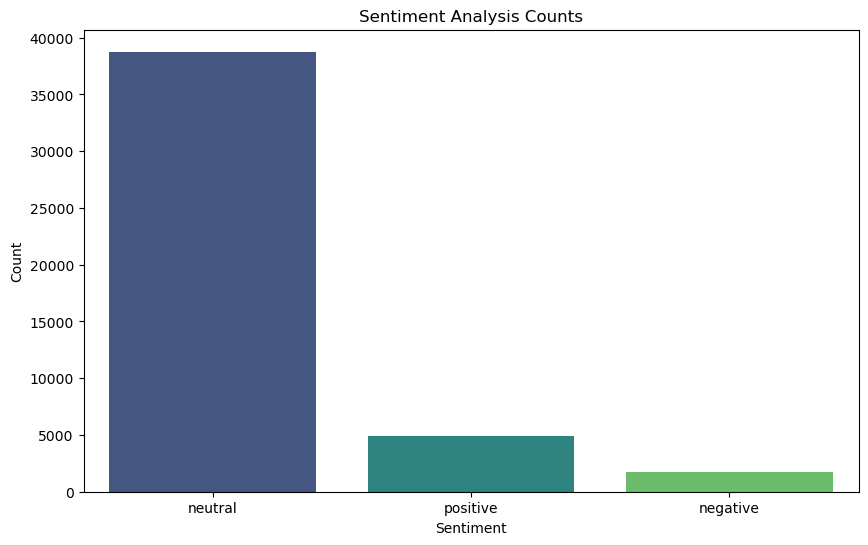

In [113]:
# Count the occurrences of each sentiment
sentiment_counts = data['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Add titles and labels
plt.title('Sentiment Analysis Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the plot
plt.show()

# Analysis
## calculate Daily Stock Returns

In [114]:
# Calculate daily stock returns
merged_df['Daily_Return'] = merged_df['Close'].pct_change()

# Display the first few rows to check the daily return column
print(merged_df[['Close', 'Daily_Return']].head())


               Close  Daily_Return
Date                              
1980-12-12  0.128348           NaN
1980-12-15  0.121652     -0.052171
1980-12-16  0.112723     -0.073398
1980-12-17  0.115513      0.024751
1980-12-18  0.118862      0.028992


## Correlation Analysis

In [115]:
# Correlate sentiment scores with daily stock returns
correlation = merged_df['Sentiment_Score'].corr(merged_df['Daily_Return'])

print(f"Correlation between sentiment scores and daily stock returns: {correlation}")


Correlation between sentiment scores and daily stock returns: 0.0012717938119761966
